# Full implemetation of KNN in Python

#### Instructions

## Part 1
Complete this notebook.

* Cells with 'COMPLETED - NO CHANGES ARE REQUIRED' in their description require no edits and should be left unchanged
* Cells with 'TO BE COMPLETED' require you to complete the code according to the given description 
* **NOTE**: After you complete the notebook and run all cells, **discuss** the results displayed in the graph produced at the end of the notebook 

In [1]:
id1 = 975312384 # fake id
id2 = 234876044 # fake id

In [2]:
def read_csv_data(str):
    data = pd.read_csv(str)
    headers = data.columns
    x = data.values

    #adding ones vector
    tmp=np.ones(len(x[0]))
    x=np.vstack([tmp,x])
    return x

In [3]:
import numpy as np
import pandas as pd

def LoadIrisData(fname):
    '''
    ***TO BE COMPLETED***
    
    Usage: load data from file in the path 'fname'
    
    Input: the path for the file that stores the data
    Output: feature matrix X, and labels vector Y
    '''
    x_data=read_csv_data(fname)
    y_dex = []
    x_data = np.delete(x_data,0,0)
    
    for i in x_data:
        if(i[5] == 'setosa'):
            y_dex.append(0)
        elif(i[5] == 'versicolor'):
            y_dex.append(1)
        else:
            y_dex.append(2)

    x_data = np.delete(x_data,0,1)
    x_data = np.delete(x_data,4,1)
    y_label_arr = np.array(y_dex)
    
    # read the features data from the csv file
    X = x_data

    # read the labels data from the csv file
    Y = y_label_arr
    
    return X, Y

In [4]:
from numpy.random import randint
def SplitTrainTest(X,Y):
    '''
    ***COMPLETED - NO CHANGES ARE REQUIRED***
    
    Input: feature matrix X, labels vector Y
    Output: X_train, Y_train - train data
            X_test, Y_test - test data
'''
    
    # permute the ordering of the examples
    ind = np.random.RandomState(seed=int(id1)+int(id2)).permutation(len(Y))

    # randomly choose the size of the training data
    Ntrain = np.random.RandomState(seed=int(id1)+int(id2)).randint(0.6*len(Y),0.8*len(Y))

    # split the data into train and test datasets
    X_train = X[ind[:Ntrain]]
    Y_train = Y[ind[:Ntrain]]
    X_test  = X[ind[Ntrain:]]
    Y_test  = Y[ind[Ntrain:]]
    
    return X_train, Y_train, X_test, Y_test

In [5]:
import math
def PairwiseDistance(a,b):
    '''
    ***TO BE COMPLETED***
    
    Usage: compute the euclidean distance between pair of examples
    
    Input: two numerical vectors of equal length
    Output: the euclidean distance between the vectors
    
    Example: 
    PairwiseDistance([3, 1],[6, 5]) returns 5
    [calculation: sqrt((3-6)^2+(1-5)^2) = sqrt(9+16) = 5]
    '''
    
    # The function math.dist() calculates the euclidean distance.  
    return math.dist(a,b)

In [6]:
def SortArray(a):
    '''
    ***TO BE COMPLETED***
    
    Usage: return the ordering of the elements of the input array such that their values are ascending
    
    Input: a vector with numerical values
    Output: the indices of the input array, such that the array is sorted in ascending order
    
    Example: 
    SortArray([1.34, 2.18, 1.21]) returns [2,0,1]
                
    '''
    
    b = a.copy()   # Create a copy of the original array
    b.sort()       # Sort it in ascending order
    indx_arr = []
    
    for i in range (len(b)): # For each item in the sorted array
        for j in range(len(a)): # compare with each item in the original array
            if b[i] == a[j]: 
                if (indx_arr.count(j)) == 0:
                    indx_arr.append(j) # save the unique index from the original array
    return indx_arr

In [7]:
def MajorityVote(inds, y, K):
    '''
    ***TO BE COMPLETED***
    
    Usage: find the most frequent label in y's K leading values, after it sorted acording to inds
    
    Input: inds - an ordering of y
           y    - a vector of labels
           K    - an integer
    Output: most frequent label
    
    Example 1: 
    MajorityVote(inds = [2, 0, 1, 3, 5, 4], 
                  y    = ['setosa', 'setosa', 'versicolor', 'setosa', 'virginica', 'versicolor'],
                  K    = 1)
    returns 'versicolor'

    Example 2: 
    MajorityVote(inds = [2, 0, 1, 3, 5, 4], 
                  y    = ['setosa', 'setosa', 'versicolor', 'setosa', 'virginica', 'versicolor'], 
                  K    = 3)
    returns 'setosa'
    '''
    # the labels of the K nearest neighbors
    optional_labels = []
    for i in range(len(y)): # Loop through the labels
        if(optional_labels.count(y[i]) == 0):
            optional_labels.append(y[i])    # Save unique labels
            
    # counting the number occurences of each label amongst the K nearest neighbors
    labels_occurence_arr = []
    for label in optional_labels:
        labels_occurence_arr.append(y.count(label))
        
    # the most frequent label amongst the K nearest neighbors
    freq_label_val = np.max(labels_occurence_arr)
    freq_label_indx = labels_occurence_arr.index(freq_label_val)
    freq_label = optional_labels[freq_label_indx]
    
    return freq_label

In [8]:
def KNearestNeighborsClassifier(X_train, Y_train , X_test, K):
    '''
    ***TO BE COMPLETED***

    def KNearestNeighborsClassifier(X_train, Y_train , X_test, K):

    Usage: estimate the label of each unclassified example in X_test to be the most 
           frequent label amongst its K nearest neighbors in X_train

    Input:  X_train - training data (features)
            Y_train - training data (labels) 
            X_test  - test data (features)
            K       - number of neighbors

    Output: Y_test  - the classifier's labels for the test data

    '''
    Y_pred = []

    # loop through the examples to be classified
    for x_test_sample in X_test:
        
        dist_array=[]
        indx_array = np.array([])

        # compute the pairwise distances between the each unclassified example and all classified examples
        for x_train_sample in X_train:
            dist_array.append(PairwiseDistance(x_test_sample, x_train_sample))
        indx_array = SortArray(dist_array)
        
        # find the unclassified example's K nearest neighbors
        k_neighbors_indx = []
        k_neighbors_label = []
        
        for k in range(K):                
            k_neighbors_indx.append(indx_array[k])
            k_neighbors_label.append(Y_train[indx_array[k]])
        
        # estimate the unclassified example's label according to the labels of its K nearest neighbors
        Y_pred.append(MajorityVote(k_neighbors_indx, k_neighbors_label, K))
        
    return Y_pred

In [9]:
import matplotlib.pyplot as plt

def PlotAccuracy(accuracy):
    plt.figure(figsize=(14,5))
    plt.plot(accuracy,'.-')
    plt.xlabel('K')
    plt.ylabel('Accuracy')
    plt.title('KNN estimated accuracy for various values of K');
    return

In [10]:
def Accuracy(Y_pred, Y_test):
    
    '''    
     ***TO BE COMPLETED***
    
    Usage: calculate the classifier accuracy 
    
    Input: Y_test - true labels of X_test
           Y_pred - estimated labels of X_test
    Output: accuracy - the nember of correctly classified examples, divided by the total number of examples    

    Example: 
    calling Accuracy(Y_pred = ['setosa', 'setosa', 'versicolor', 'setosa', 'virginica']), 
                     Y_test = ['setosa', 'setosa', 'versicolor', 'versicolor', 'virginica']))
    returns 0.8
        '''
    
    # calculate the accuracy - the ratio between the number of examples in X_test for which
    # the true label and the estimated label are the same, and the total number of examples in X_test
    
    res = 0
    
    for i in range(0, len(Y_test)):
        #print( "Y_test[i]=", Y_test[i], "Y_pred[i]=", Y_pred[i])        
        if Y_test[i] == Y_pred[i]:
            res += 1

    return res/len(Y_test)

In [16]:
def main(fname, Kmax):
    '''
    ***COMPLETED - NO CHANGES ARE REQUIRED***
    '''    
    # STEP 1: load data
    X,Y = LoadIrisData(fname)
    
    # STEP 2: split the data into train/test datasets
    X_train, Y_train, X_test, Y_test = SplitTrainTest(X,Y)
    print('Data is split into ' + str(X_train.shape[0]) + ' examples for training and ' + str(X_test.shape[0]) + ' examples for testing')

    
    # an array to store all computed accuracies
    accuracy = np.zeros(Kmax)
    
    # repeat for all considered values of K
    for K in range(Kmax):
        # STEP 3: classify the test data using a KNN classifier
        Y_pred = KNearestNeighborsClassifier(X_train, Y_train, X_test , K+1)

        # STEP 4: calculate the KNN classifier accuracy
        accuracy[K] = Accuracy(Y_pred, Y_test)
    
    # plot results
    PlotAccuracy(accuracy)
    return

Data is split into 102 examples for training and 48 examples for testing
0.7995833333333334


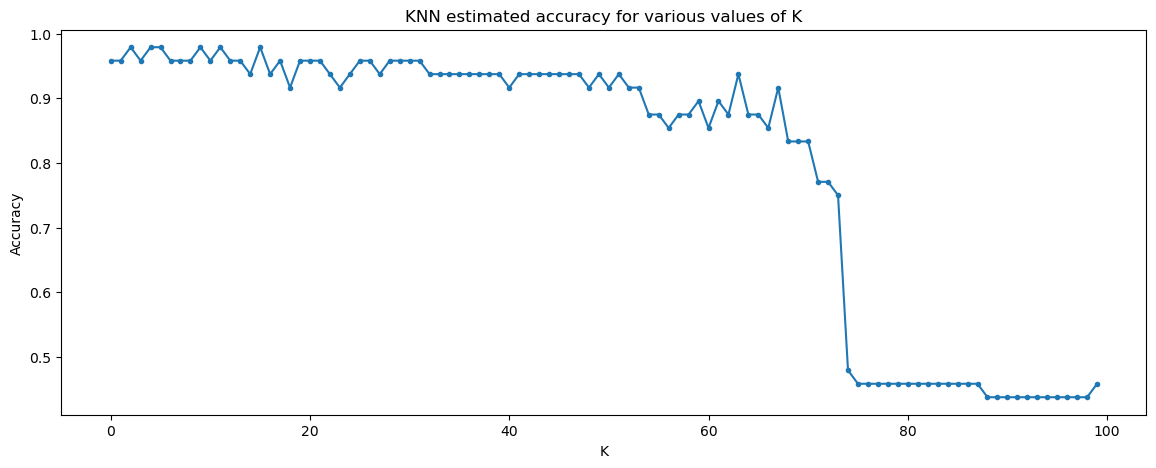

In [17]:
fname = 'iris.csv'
Kmax = 100
main(fname, Kmax)

The graph above displays the different accuracy values of the test dataset for different values of k.
We can see that the accuracy is quite stable when k<25 but then starts to decline slowly when k>50 and 
then declines rapidly when k>70.




## Part 2:

#### Repeat part 1 a 100 times - each time with a different data split.
#### Plot a *single* graph, where k is the x-axis and the avearge of each 100 runs is the y-axis.
##### Note: In Part 1 the accuracy vector's length was Kmax. in Part 2 you'll need to calculate an accuracy matrix with dimensions 100 x Kmax. Then, calculate the average of each row (k) and get a vector of accuracy averages (again with Kmax length).

i = 0
Data is split into 116 examples for training and 34 examples for testing
i = 1
Data is split into 108 examples for training and 42 examples for testing
i = 2
Data is split into 118 examples for training and 32 examples for testing
i = 3
Data is split into 114 examples for training and 36 examples for testing
i = 4
Data is split into 108 examples for training and 42 examples for testing
i = 5
Data is split into 109 examples for training and 41 examples for testing
i = 6
Data is split into 105 examples for training and 45 examples for testing
i = 7
Data is split into 113 examples for training and 37 examples for testing
i = 8
Data is split into 101 examples for training and 49 examples for testing
i = 9
Data is split into 107 examples for training and 43 examples for testing
i = 10
Data is split into 106 examples for training and 44 examples for testing
i = 11
Data is split into 111 examples for training and 39 examples for testing
i = 12
Data is split into 102 examples for trainin

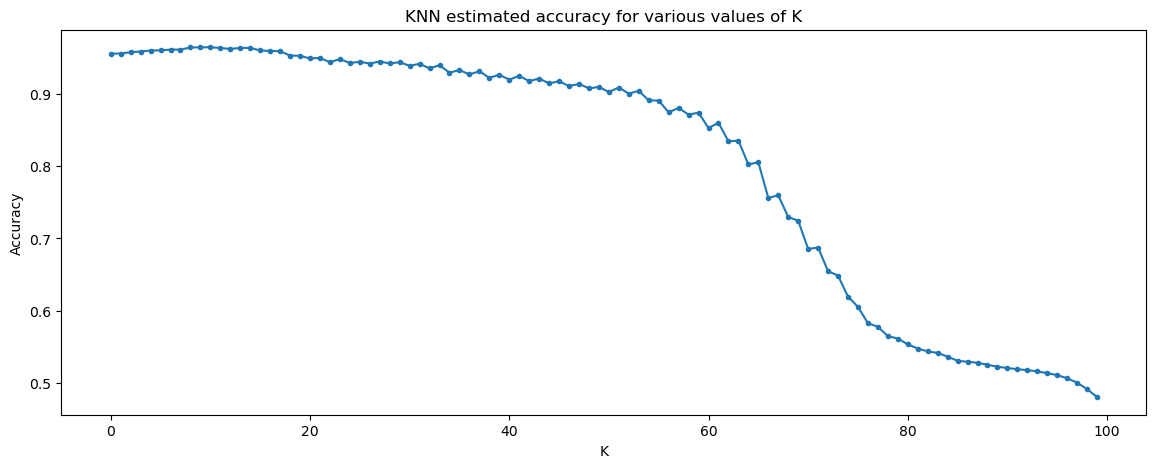

In [46]:
import random
import numpy as np

fname = 'iris.csv'
mul = 100
Kmax = 100
accuracy_mat = np.empty((mul,Kmax))
avg_accuracy_vec = []

# STEP 1: load data
X,Y = LoadIrisData(fname)

for i in range(mul):
    print("i =",i )
    # In SplitTrainTest(X,Y) we use 2 students ids to randomize the data.
    # we will choose 2 random numbers in the same proportion (9 digit numbers)
    id1 = random.randint(100000000, 999999999)
    id2 = random.randint(100000000, 999999999)
        
    # STEP 2: split the data into train/test datasets
    X_train, Y_train, X_test, Y_test = SplitTrainTest(X,Y)
    while len(X_train) < Kmax:
        id1 = random.randint(100000000, 999999999)
        id2 = random.randint(100000000, 999999999)
        X_train, Y_train, X_test, Y_test = SplitTrainTest(X,Y)
        
    print('Data is split into ' + str(X_train.shape[0]) + ' examples for training and ' + str(X_test.shape[0]) + ' examples for testing')
    
    # repeat for all considered values of K
    for k in range(Kmax):
        # STEP 3: classify the test data using a KNN classifier
        Y_pred = KNearestNeighborsClassifier(X_train, Y_train, X_test , k+1)
        # STEP 4: calculate the KNN classifier accuracy
        accuracy_mat[i][k] = Accuracy(Y_pred, Y_test)

# Calculate the average of each column - represting the values of K
avg_accuracy_vec.append(np.mean(accuracy_mat, axis=0)) 
PlotAccuracy(avg_accuracy_vec[0])

We can see the average estimated accuracy of KNN for various values of K, for 100 independet random data splits.
If we take a close look at lower values (K<20, in the following plot) we can see that the best values for K are around K=10.

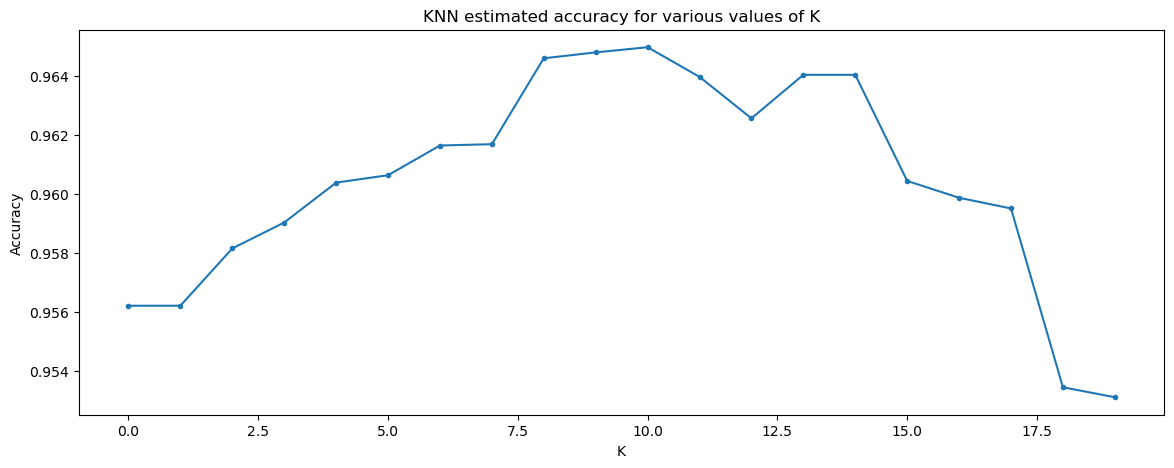

In [47]:
PlotAccuracy(avg_accuracy_vec[0][:20])